In [ ]:

# A base pode ser encontrada em: 
# https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?datasetId=2355600

In [3]:
# 

In [1]:
#  Importando as bibliotecas que serão utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Lendo o arquivo e visualizando as informações do dataset
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
# Visualizando os tipos de informação presentes em cada coluna
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


(4746, 12)

In [4]:
# Verificando e somando a quantidade de dados nulos em casa coluna
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
# Verificando a quantidade de valores únicos em cada coluna
data.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [6]:
#  Começando a tratar os dados
#  -> Nesse ponto é necessário ter bem definido o que deseja análisar,
#  o que precisa obter com o código, para definir quais dados serão úteis
#  e quais serão utilizados para a analise.

In [7]:
# Categorizando os valores de aluguel por faixa de valor

conditions = [
    (data["Rent"] <= 2000),
    (data["Rent"] > 2000) & (data["Rent"] <= 3000),
    (data["Rent"] > 3000) & (data["Rent"] <= 4000),
    (data["Rent"] > 4000) & (data["Rent"] <= 5000),
    (data["Rent"] > 5000) & (data["Rent"] <= 6000),
    (data["Rent"] > 6000) & (data["Rent"] <= 7000),
    (data["Rent"] > 7000) & (data["Rent"] <= 8000),
    (data["Rent"] > 8000) & (data["Rent"] <= 9000),
    (data["Rent"] > 9000) & (data["Rent"] <= 10000),
    (data["Rent"] > 10000)
    ]

# Criando uma lista de valores para atribuir a cada "categoria" de valor
values = ["0-2000", "2001-3000","3001-4000","4001-5000", "5001-6000", "6001-7000","7001-8000","8001-9000","9001-10000", "10000+"]


# criando uma nova coluna com os valores atribuídos
data["Aluguel"] = np.select(conditions, values)
data.head(4)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Aluguel
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9001-10000
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9001-10000


In [8]:
# Categorizando os tamanhos do imóvel por faixa de tamanho

conditions = [
    (data["Size"] <= 600),
    (data["Size"] > 600) & (data["Size"] <= 1500),
    (data["Size"] > 1500) & (data["Size"] <= 3000),
    (data["Size"] > 3000)
    ]

# Criando uma lista de valores para atribuir a cada "categoria" de tamanho
values = ["pequeno", "médio", "grande", "super"]


# criando uma nova coluna com os valores atribuídos
data["Tamanho"] = np.select(conditions, values)
data.head(4)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Aluguel,Tamanho
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9001-10000,médio
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+,médio
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+,médio
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9001-10000,médio


In [9]:
# Limpando o dataset das colunas que não serão utilizadas

data.drop(["Posted On", "Tenant Preferred", "Point of Contact", "Furnishing Status", "Size", "Rent"], axis=1, inplace=True)
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,Ground out of 2,Super Area,Bandel,Kolkata,2,9001-10000,médio
1,2,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,10000+,médio
2,2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,1,10000+,médio
3,2,1 out of 2,Super Area,Dumdum Park,Kolkata,1,9001-10000,médio
4,2,1 out of 2,Carpet Area,South Dum Dum,Kolkata,1,7001-8000,médio


In [10]:
# Na coluna "Floor" que descreve a quantidade de pavimentos 
# irei "limpar" os dados para manter somente o andar em
# que se encontra o imóvel para locação

data["Floor"] = data["Floor"].apply(lambda x: x.split(' out of ')[0])
data.loc[data["Floor"].str.contains("Ground"), "Floor"] = "0"
data.loc[data["Floor"].str.contains("Basement"), "Floor"] = "0"
data["Floor"]=data["Floor"].astype(int)

# Vendo como ficaram os dados após o ajuste

data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,Super Area,Bandel,Kolkata,2,9001-10000,médio
1,2,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,10000+,médio
2,2,1,Super Area,Salt Lake City Sector 2,Kolkata,1,10000+,médio
3,2,1,Super Area,Dumdum Park,Kolkata,1,9001-10000,médio
4,2,1,Carpet Area,South Dum Dum,Kolkata,1,7001-8000,médio


In [11]:
#  A partir de agora irei realizar a discretização dos dados.
#  Começando pelo tipo de área (Area Type) - usando o Label Encoder.

tipo_area = data["Area Type"].values
labelencoder_tipo_area = LabelEncoder()
tipo_area = labelencoder_tipo_area.fit_transform(tipo_area)

data["Area Type"] = tipo_area
data.head()


,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,Bandel,Kolkata,2,9001-10000,médio
1,2,1,2,"Phool Bagan, Kankurgachi",Kolkata,1,10000+,médio
2,2,1,2,Salt Lake City Sector 2,Kolkata,1,10000+,médio
3,2,1,2,Dumdum Park,Kolkata,1,9001-10000,médio
4,2,1,1,South Dum Dum,Kolkata,1,7001-8000,médio


In [12]:
#  Discretizando a localidade (Area Locality) - usando o Label Encoder. 

local_area = data["Area Locality"].values
labelencoder_local_area = LabelEncoder()
local_area = labelencoder_local_area.fit_transform(local_area)

data["Area Locality"] = local_area
data.head()


,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,Kolkata,2,9001-10000,médio
1,2,1,2,1527,Kolkata,1,10000+,médio
2,2,1,2,1760,Kolkata,1,10000+,médio
3,2,1,2,526,Kolkata,1,9001-10000,médio
4,2,1,1,1890,Kolkata,1,7001-8000,médio


In [13]:
#  Discretizando a cidade (City) - usando o Label Encoder.

cidade = data["City"].values
labelencoder_cidade = LabelEncoder()
cidade = labelencoder_cidade.fit_transform(cidade)

data["City"] = cidade
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,4,2,9001-10000,médio
1,2,1,2,1527,4,1,10000+,médio
2,2,1,2,1760,4,1,10000+,médio
3,2,1,2,526,4,1,9001-10000,médio
4,2,1,1,1890,4,1,7001-8000,médio


In [14]:
#  Discretizando o tamanho - usando o Label Encoder.

tamanho = data["Tamanho"].values
labelencoder_tamanho = LabelEncoder()
tamanho = labelencoder_tamanho.fit_transform(tamanho)

data["Tamanho"] = tamanho
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,4,2,9001-10000,1
1,2,1,2,1527,4,1,10000+,1
2,2,1,2,1760,4,1,10000+,1
3,2,1,2,526,4,1,9001-10000,1
4,2,1,1,1890,4,1,7001-8000,1


In [15]:

aluguel = data["Aluguel"].values
labelencoder_aluguel = LabelEncoder()
aluguel = labelencoder_aluguel.fit_transform(aluguel)

data["Aluguel"] = aluguel
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,4,2,9,1
1,2,1,2,1527,4,1,1,1
2,2,1,2,1760,4,1,1,1
3,2,1,2,526,4,1,9,1
4,2,1,1,1890,4,1,7,1


In [16]:
# Verificando a quantidade de valores únicos em cada coluna
data.nunique()

BHK                 6
Floor              52
Area Type           3
Area Locality    2235
City                6
Bathroom            8
Aluguel            10
Tamanho             4
dtype: int64

In [17]:
# Separando o dataset em conjunto de treino e de teste

df_train, df_test=train_test_split(data, 
                                   test_size=0.3, 
                                   random_state=20)


In [18]:
# verificando as informações de formato de cada conjunto
# treinamento e teste

df_train.shape, df_test.shape

((3322, 8), (1424, 8))

In [55]:
#  Criando o X e y e definindo os conjuntos

X_train= df_train.drop(["Aluguel"], axis=1)
y_train= df_train["Aluguel"]
X_test=df_test.drop(["Aluguel"], axis=1)
y_test=df_test["Aluguel"]

In [56]:
len(X_train), len(X_test)

(3322, 1424)

In [71]:
# Treinando o modelo usando o Keras TensorFlow

model = keras.Sequential(layers.Dense(8, activation= 'sigmoid', input_shape=[7]))

model.add(layers.Dense(1, activation= 'sigmoid'))

model.summary()
Model: "sequential_1"

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 64        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [74]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=20,
    verbose=1,
)


Epoch 1/20
73/73 [==============================] - 0s 4ms/step - loss: -38.1573 - binary_accuracy: 0.7170 - val_loss: -35.6792 - val_binary_accuracy: 0.7402
Epoch 2/20
73/73 [==============================] - 0s 3ms/step - loss: -38.9484 - binary_accuracy: 0.7170 - val_loss: -36.4091 - val_binary_accuracy: 0.7402
Epoch 3/20
73/73 [==============================] - 0s 3ms/step - loss: -39.7538 - binary_accuracy: 0.7170 - val_loss: -37.1550 - val_binary_accuracy: 0.7402
Epoch 4/20
73/73 [==============================] - 0s 3ms/step - loss: -40.5293 - binary_accuracy: 0.7170 - val_loss: -37.8839 - val_binary_accuracy: 0.7402
Epoch 5/20
73/73 [==============================] - 0s 3ms/step - loss: -41.3240 - binary_accuracy: 0.7170 - val_loss: -38.6191 - val_binary_accuracy: 0.7402
Epoch 6/20
73/73 [==============================] - 0s 3ms/step - loss: -42.1179 - binary_accuracy: 0.7170 - val_loss: -39.3548 - val_binary_accuracy: 0.7402
Epoch 7/20
73/73 [==============================] - 

In [78]:
# Verificando os valores obtidos de loss e accuracy durante o 
# treino do modelo 

history_df = pd.DataFrame(history.history)
print(history_df)

         loss  binary_accuracy   val_loss  val_binary_accuracy
0  -38.157337         0.716989 -35.679237             0.740221
1  -38.948448         0.716989 -36.409149             0.740221
2  -39.753834         0.716989 -37.154957             0.740221
3  -40.529312         0.716989 -37.883926             0.740221
4  -41.323978         0.716989 -38.619057             0.740221
5  -42.117893         0.716989 -39.354771             0.740221
6  -42.937119         0.716989 -40.109478             0.740221
7  -43.717209         0.716989 -40.830585             0.740221
8  -44.527058         0.716989 -41.573723             0.740221
9  -45.324654         0.716989 -42.311646             0.740221
10 -46.125336         0.716989 -43.049828             0.740221
11 -46.908558         0.716989 -43.785595             0.740221
12 -47.711479         0.716989 -44.525948             0.740221
13 -48.518574         0.716989 -45.272682             0.740221
14 -49.321785         0.716989 -46.012444             0

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,-38.157337,0.716989,-35.679237,0.740221
1,-38.948448,0.716989,-36.409149,0.740221
2,-39.753834,0.716989,-37.154957,0.740221
3,-40.529312,0.716989,-37.883926,0.740221
4,-41.323978,0.716989,-38.619057,0.740221


Best validation loss: -49.6620
Best Validation Accuracy: 0.7170


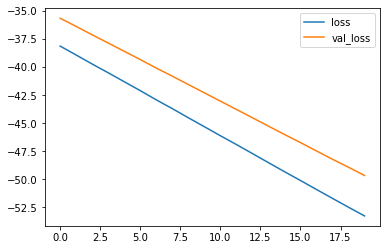

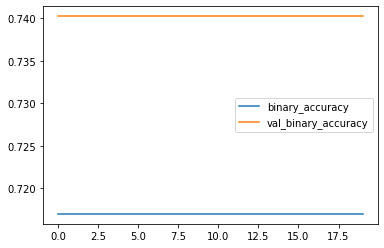

In [79]:
#  Começar a plotagem no epoch 0

def display_hist(history):
    history_df = pd.DataFrame(history.history)
    display(history_df.head())
    history_df.loc[0:,['loss','val_loss']].plot()
    history_df.loc[0:,['binary_accuracy','val_binary_accuracy']].plot()

    print(("Best validation loss: {:0.4f}" +\
       "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['binary_accuracy'].max()))

display_hist(history)

In [80]:
#  RESULTADOS

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def print_results(y_test,y_pred):
    print("Matriz de confusão: \n",confusion_matrix(y_test,y_pred))
    print(10*"---------")
    print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))
    print("Acuracidade:", accuracy_score(y_test,y_pred))
    return
y_pred = model.predict(X_test) > 0.5

print_results(y_test, y_pred)

45/45 [==============================] - 0s 2ms/step
Matriz de confusão: 
 [[   0    2    0    0    0    0    0    0    0]
 [   0 1013    0    0    0    0    0    0    0]
 [   0   12    0    0    0    0    0    0    0]
 [   0   31    0    0    0    0    0    0    0]
 [   0   44    0    0    0    0    0    0    0]
 [   0   80    0    0    0    0    0    0    0]
 [   0   81    0    0    0    0    0    0    0]
 [   0   69    0    0    0    0    0    0    0]
 [   0   92    0    0    0    0    0    0    0]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        True       0.71      1.00      0.83      1013

   micro avg       0.71      1.00      0.83      1013
   macro avg       0.71      1.00      0.83      1013
weighted avg       0.71      1.00      0.83      1013

Acuracidade: 0.711376404494382
